<a href="https://colab.research.google.com/github/gitarshmah/Boolean_Gang/blob/ML-Framework/INFY_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import nsepy as nse
import datetime
from datetime import date as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly as py

In [4]:
comp_symbol = 'INFY'

## Load Dataset

In [9]:
today = dt.today()
two_yrs = today - datetime.timedelta(days = int(2.5*365))

In [10]:
#Load dataset
stock = nse.get_history(symbol=comp_symbol, index = False, start=two_yrs, end=today)

In [11]:
stock

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-08-12,INFY,EQ,948.45,948.00,958.80,942.20,952.85,954.95,950.21,6908732,6.564723e+14,89286,2560388,0.3706
2020-08-13,INFY,EQ,954.95,954.80,968.50,948.25,952.30,951.20,956.51,5097705,4.876026e+14,87144,1882537,0.3693
2020-08-14,INFY,EQ,951.20,955.85,963.00,952.05,954.50,953.60,957.20,4663873,4.464257e+14,88402,1975922,0.4237
2020-08-17,INFY,EQ,953.60,954.10,972.45,954.10,958.30,957.50,962.38,9008716,8.669769e+14,140270,2894495,0.3213
2020-08-18,INFY,EQ,957.50,963.90,969.20,958.70,967.10,967.55,964.28,6142171,5.922744e+14,119041,2806845,0.4570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03,INFY,EQ,1583.75,1597.50,1604.65,1573.00,1595.65,1599.40,1593.62,7040194,1.121937e+15,191136,4844776,0.6882
2023-02-06,INFY,EQ,1599.40,1598.00,1598.00,1561.60,1565.00,1569.85,1570.72,4570612,7.179133e+14,154367,2890524,0.6324
2023-02-07,INFY,EQ,1569.85,1569.00,1576.05,1555.10,1563.10,1562.40,1567.15,4336238,6.795552e+14,122034,3070813,0.7082


In [12]:
df = stock

## Analysis

In [13]:
stock['MA60'] = df['Close'].rolling(window=45, min_periods=0).mean()
stock['MA45'] = df['Close'].rolling(window=15, min_periods=0).mean()
stock['MA90'] = df['Close'].rolling(window=90, min_periods=0).mean()

In [14]:
fig = make_subplots(rows=2, cols = 1, shared_xaxes=True, subplot_titles=[comp_symbol, 'Volume'], vertical_spacing=0.10, row_heights=[0.7, 0.3]) #vertical_spacing, row_width

fig.add_trace(go.Candlestick(x=df.index, open=stock['Open'], close=stock['Close'], high=stock['High'], low=stock['Low'], name=comp_symbol) , row=1, col=1 )

fig.add_trace(go.Scatter(x=df.index, y=stock['MA90'], marker_color='lightgrey', name='MA90'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=stock['MA60'], marker_color='black', name='MA60'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=stock['MA45'], marker_color='grey', name='MA45'), row=1, col=1)

fig.add_trace(go.Bar(x=df.index, y=stock['Volume'], marker_color='red', showlegend=False), row=2, col=1)

fig.update_layout(
    title= comp_symbol + ' historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price (Rs/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=False,
    width=1300,
    height=500,
    margin=dict(l=50, r=50, b=50, t=100, pad=3),
    paper_bgcolor='LightSteelBlue'
)
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show(renderer='colab')

## Data Preprocessing

In [15]:
pred_days = 45
timestep = 90

In [16]:
df = df[['Close']]

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))

# df_train = df

# Test = 45 days
df_test = df[-pred_days:]
df_train = df[:-pred_days]
df_test.shape, df_train.shape

# Train-Val split (70-30)
trainSize = int(len(df_train) * 0.8)
df_val = df_train[trainSize:]
df_train = df_train[:trainSize]

# Create Train-Val 
train_set = df_train.values
val_set = df_val.values

train_set = scaler.fit_transform(np.array(train_set).reshape(-1,1))
val_set = scaler.fit_transform(np.array(val_set).reshape(-1,1))

def data_prep(dataset, timestep):
  X, y = [], []
  for i in range(timestep, dataset.shape[0]):
    X.append(dataset[i-timestep:i, 0])
    y.append(dataset[i,0])
  
  return (np.array(X), np.array(y))


(x_train, y_train) = data_prep(train_set, timestep)
(x_val, y_val) = data_prep(val_set, timestep)

x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, newshape = (x_val.shape[0], x_val.shape[1], 1))

  # return (x_train, y_train), (x_val, y_val), scaler

## Define the model

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

opt = Adam(learning_rate = 0.001)
huber = Huber()
model.compile(optimizer = opt, loss=huber, metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 90, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 90, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 90, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

## Train the model

In [20]:
# Train the model
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2, validation_data=(x_val, y_val)) 

Epoch 1/100
12/12 - 3s - loss: 0.0057 - mae: 0.0824 - val_loss: 0.0213 - val_mae: 0.1844 - 3s/epoch - 245ms/step
Epoch 2/100
12/12 - 1s - loss: 0.0053 - mae: 0.0808 - val_loss: 0.0199 - val_mae: 0.1774 - 1s/epoch - 121ms/step
Epoch 3/100
12/12 - 1s - loss: 0.0049 - mae: 0.0760 - val_loss: 0.0108 - val_mae: 0.1292 - 1s/epoch - 120ms/step
Epoch 4/100
12/12 - 1s - loss: 0.0045 - mae: 0.0733 - val_loss: 0.0102 - val_mae: 0.1256 - 1s/epoch - 120ms/step
Epoch 5/100
12/12 - 1s - loss: 0.0045 - mae: 0.0743 - val_loss: 0.0121 - val_mae: 0.1371 - 1s/epoch - 119ms/step
Epoch 6/100
12/12 - 1s - loss: 0.0047 - mae: 0.0732 - val_loss: 0.0085 - val_mae: 0.1164 - 1s/epoch - 118ms/step
Epoch 7/100
12/12 - 1s - loss: 0.0049 - mae: 0.0751 - val_loss: 0.0068 - val_mae: 0.1042 - 1s/epoch - 120ms/step
Epoch 8/100
12/12 - 2s - loss: 0.0056 - mae: 0.0822 - val_loss: 0.0104 - val_mae: 0.1272 - 2s/epoch - 180ms/step
Epoch 9/100
12/12 - 2s - loss: 0.0047 - mae: 0.0761 - val_loss: 0.0147 - val_mae: 0.1509 - 2s/ep

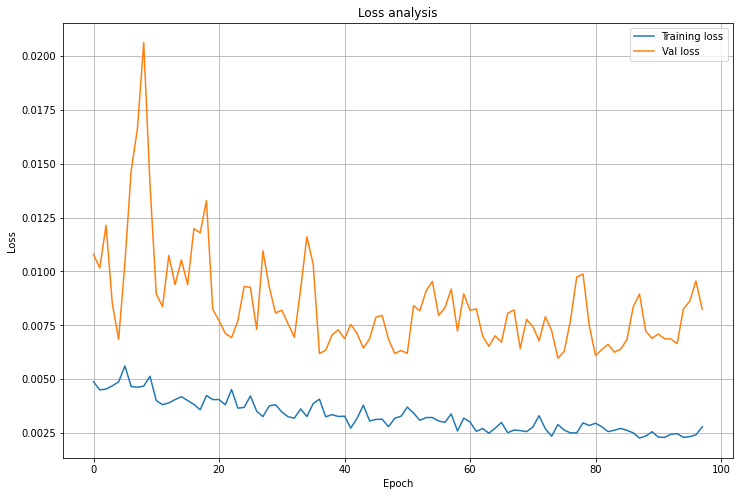

In [23]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'][2:], label = "Training loss")
plt.plot(hist.history['val_loss'][2:], label = "Val loss")
plt.title("Loss analysis")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid("both")

## Model Evaluation

In [24]:
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)

train_pred = scaler.inverse_transform(train_pred)
val_pred = scaler.inverse_transform(val_pred)

train_set_temp = scaler.inverse_transform(train_set)
val_set_temp = scaler.inverse_transform(val_set)

1/1 [==============================] - 0s 45ms/step


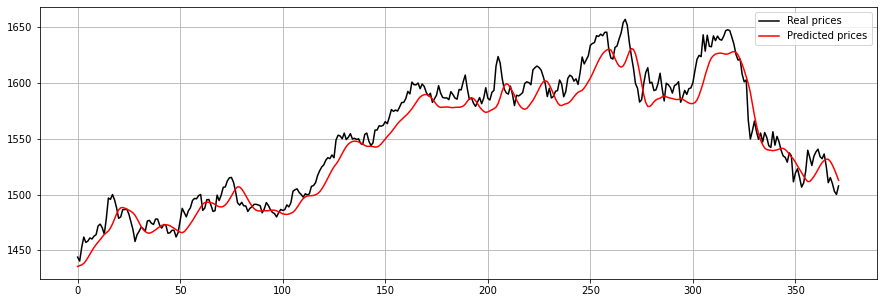

In [25]:
x1 = train_set_temp[-(train_pred.shape[0]):]
plt.figure(figsize = (15,5))
plt.plot(x1, color = 'black', label = 'Real prices')
plt.plot(train_pred, color='red', label='Predicted prices')
plt.legend()
plt.grid()

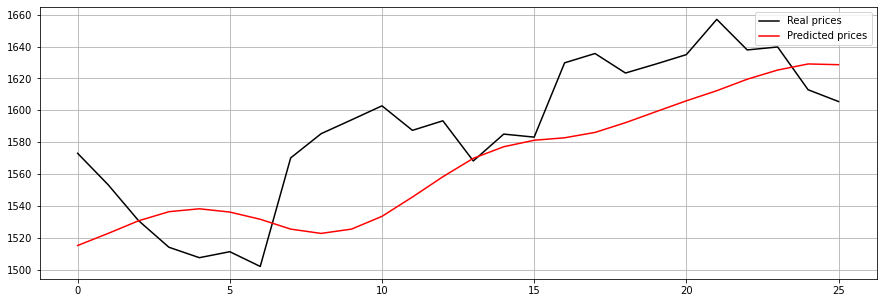

In [26]:
x2 = val_set_temp[-(val_pred.shape[0]):]
plt.figure(figsize = (15,5))
plt.plot(x2, color = 'black', label = 'Real prices')
plt.plot(val_pred, color='red', label='Predicted prices')
plt.legend()
plt.grid()

## Prediction

In [27]:
train_dataset = pd.concat([df_train, df_val])

train_values = train_dataset.values

In [28]:
def prediction(timestep, inp):
  input = inp[-(timestep+pred_days):]

  input = scaler.fit_transform(np.array(input).reshape(-1,1))

  x_test = []
  for i in range(timestep, input.shape[0]):
    x_test.append(input[(i - timestep) : i , 0])
  x_test = np.array(x_test)

  x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

  return x_test, scaler

In [29]:
x_test, scaler = prediction(timestep, train_values)
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

2/2 [==============================] - 0s 26ms/step


Text(0, 0.5, 'Price (Rs/Share)')

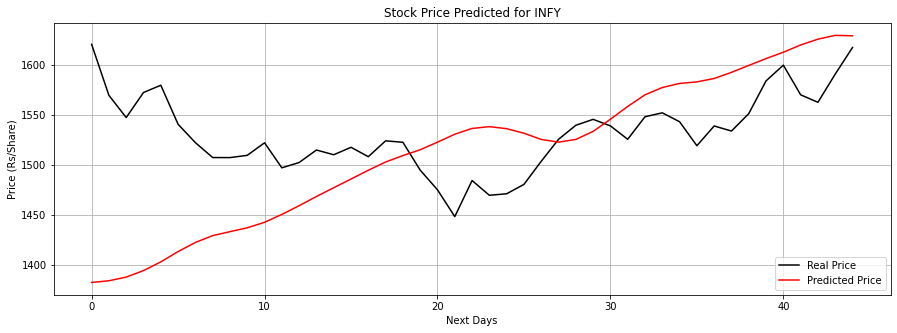

In [31]:
plt.figure(figsize=(15,5))

plt.plot(df_test.values, color='black', label='Real Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.grid()
plt.legend()
plt.title(f"Stock Price Predicted for {comp_symbol}")
plt.xlabel("Next Days")
plt.ylabel("Price (Rs/Share)")